# Ch4, one more again

In [6]:
import numpy as np
import random
import pandas as pd
import scipy.stats

import matplotlib as plt
import matplotlib.pyplot as plt
plt.rcdefaults()
import matplotlib as mpl
mpl.rc("figure", facecolor="white")
plt.rc('axes', axisbelow=True)

import pymc3 as pm

# EASY

In [7]:
# on paper


# MEDIUM

## 4M1

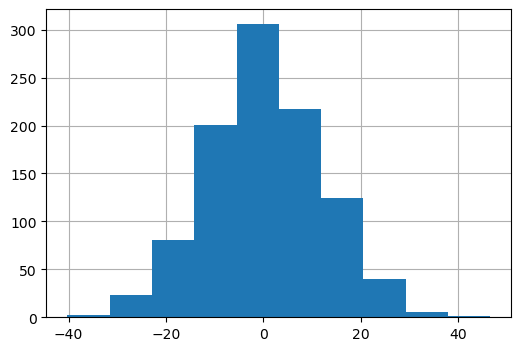

In [8]:
# simulate observed heights from the prior
# y ~ N(u, sig)
# u ~ N(0,10)
# sig ~ U(0, 10)

u = np.random.normal(0, 10, size=1000)
sig = np.random.uniform(0, 10, size=1000)

heights = np.random.normal(u, sig, size=1000)
plt.figure(figsize=(6,4))
plt.grid()
plt.hist(heights)
plt.show()

## 4M2

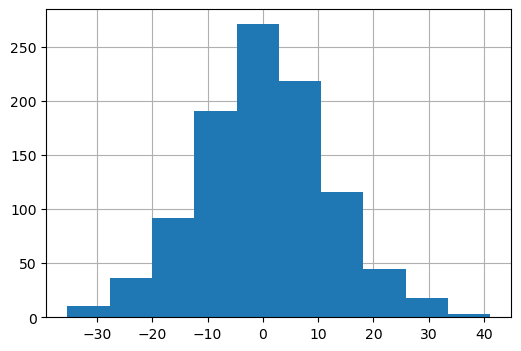

In [9]:
# translate into a map formula
heights = list(map(lambda x, y: np.random.normal(x, y), u, sig))
plt.figure(figsize=(6,4))
plt.grid()
plt.hist(heights)
plt.show()

# 4M4

# 4H1

In [10]:
data = pd.read_csv('howell.txt', sep=';')
data.head(2)

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0


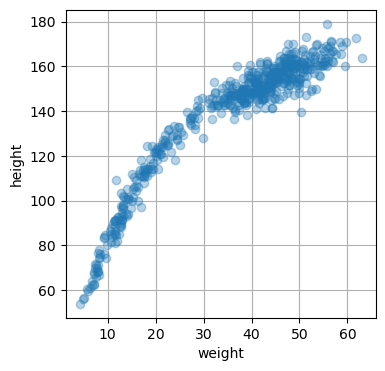

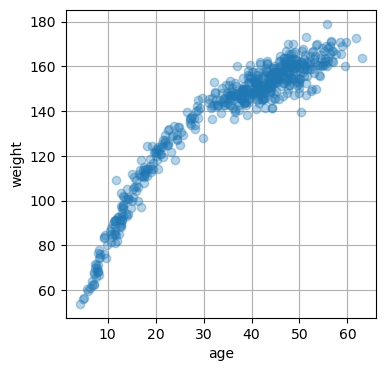

In [11]:
plt.figure(figsize=(4,4))
plt.scatter(x=data['weight'], y=data['height'], alpha=0.33)
plt.xlabel('weight')
plt.ylabel('height')
plt.grid()
plt.show()

plt.figure(figsize=(4,4))
plt.scatter(x=data['weight'], y=data['height'], alpha=0.33)
plt.xlabel('age')
plt.ylabel('weight')
plt.grid()
plt.show()

In [12]:
data['height'].mean()

138.26359632352944

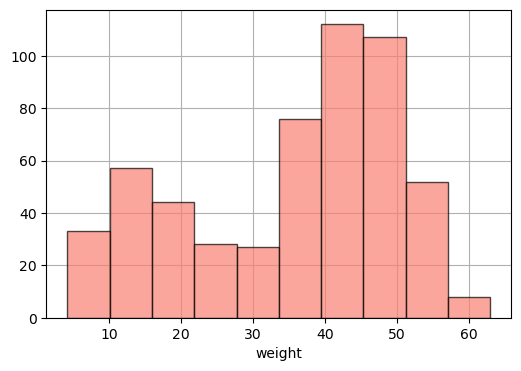

In [13]:
plt.figure(figsize=(6,4))
plt.hist(data['weight'], alpha=0.7, edgecolor='black', color='salmon')
plt.xlabel('weight')
plt.grid()
plt.show()

In [14]:
data['weight'].describe() 

count    544.000000
mean      35.610618
std       14.719178
min        4.252425
25%       22.007717
50%       40.057844
75%       47.209005
max       62.992589
Name: weight, dtype: float64

In [15]:
with pm.Model() as linear_model:
    
    # Priors
    alpha = pm.Normal('alpha', mu=150, sigma=6)
    beta = pm.Normal('beta', mu=0, sigma=10)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    
    # Deteriministic
    mu = alpha + beta * data['weight'].values
    
    # Likelihood
    height = pm.Normal('likelihood_height', mu=mu, sigma=sigma, observed=data['height'])
    

In [16]:
trace = pm.sample(draws=1000, model=linear_model)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 23 seconds.
The acceptance probability does not match the target. It is 0.889434262727236, but should be close to 0.8. Try to increase the number of tuning steps.


(array([ 20.,  82., 208., 452., 533., 410., 220.,  58.,  13.,   4.]),
 array([74.26701093, 75.03314484, 75.79927875, 76.56541265, 77.33154656,
        78.09768047, 78.86381438, 79.62994829, 80.3960822 , 81.16221611,
        81.92835002]),
 <a list of 10 Patch objects>)

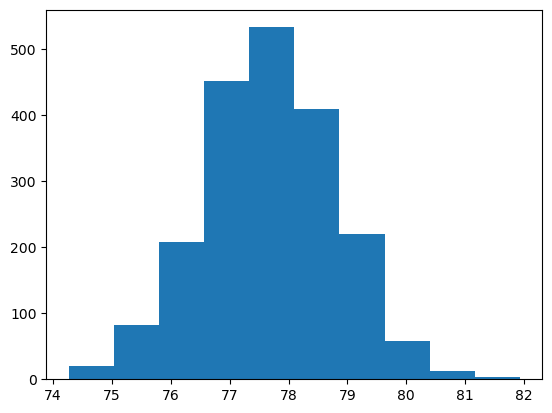

In [17]:
plt.hist(trace['alpha'])

In [18]:
# weights to make predictions on
preds = [46.95, 43.72, 64.78, 32.59, 54.63]

In [19]:
# get the samples
samples = pd.DataFrame({'alpha': trace['alpha'],
                        'beta': trace['beta'],
                        'sigma': trace['sigma']})

samples.head()

,alpha,beta,sigma
0,77.584708,1.718378,9.190388
1,77.412955,1.724726,9.223116
2,80.413412,1.648648,9.388103
3,79.969425,1.643906,9.695690
4,80.334125,1.627822,9.751554


In [20]:
for pred in preds:
    height = samples['alpha'] + samples['beta']*pred
    
    print(pred, round(height.mean(), 2))
    

46.95 157.98
43.72 152.45
64.78 188.47
32.59 133.42
54.63 171.11


# 4H2

## A

In [23]:
youth = data[data['age'] < 18]
youth.shape

(192, 4)

In [24]:
youth.head(2)

,height,weight,age,male
18,121.92,19.617854,12.0,1
19,105.41,13.947954,8.0,0


In [25]:
youth['height'].mean()

108.31885312499996

In [26]:
youth['height'].std()

25.74513904868482

In [27]:
with pm.Model() as linear_model:
    
    # Priors
    alpha = pm.Normal('alpha', mu=110, sigma=60)
    beta = pm.Normal('beta', mu=0, sigma=10)
    sigma = pm.Uniform('sigma', lower=0, upper=30)
    
    # Deteriministic
    mu = alpha + beta * youth['weight'].values
    
    # Likelihood
    height = pm.Normal('likelihood_height', mu=mu, sigma=sigma, observed=youth['height'])

In [28]:
trace = pm.sample(draws=1000, model=linear_model)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 20 seconds.


In [29]:
# intrepret coeffecients
print('alpha', trace['alpha'].mean())
print('beta', trace['beta'].mean())

alpha 58.26532977735055
beta 2.7188081767144987


In [30]:
pm.find_MAP(model=linear_model)

{'alpha': array(58.26099158),
 'beta': array(2.71872831),
 'sigma_interval__': array(-0.93833331),
 'sigma': array(8.4371139)}

In [31]:
print('alpha', trace['alpha'].std())



alpha 1.4550776328024058


# B

In [32]:
samples = pd.DataFrame({'alpha': trace['alpha'],
                        'beta': trace['beta'],
                        'sigma': trace['sigma']})

samples.head()

,alpha,beta,sigma
0,57.749135,2.708035,7.982355
1,57.770469,2.718548,7.995549
2,57.771386,2.782898,8.167039
3,56.599145,2.801109,8.112739
4,57.529122,2.752452,8.953995


In [33]:
# 90% HDPI of mean, superimpose MAP
x = []; y_top = []; y_bottom = []; map_ = []

for weight in youth['weight']:
    
    weight_dist = samples['alpha'] + samples['beta']*weight
    
    map_value = weight*trace['beta'].mean() + trace['alpha'].mean()
    map_.append(map_value)
    
    hdpi = pm.stats.hpd(weight_dist.values, hdi_prob=0.89)
    x.append(weight)
    y_top.append(hdpi[0])
    y_bottom.append(hdpi[1])
    

/opt/anaconda3/lib/python3.8/site-packages/arviz/stats/stats.py:337: UserWarning: hpd will be deprecated Please replace hdi
  warnings.warn(


In [34]:
pm.stats.hpd(weight_dist.values, hdi_prob=0.89)

array([78.55743599, 81.55864428])

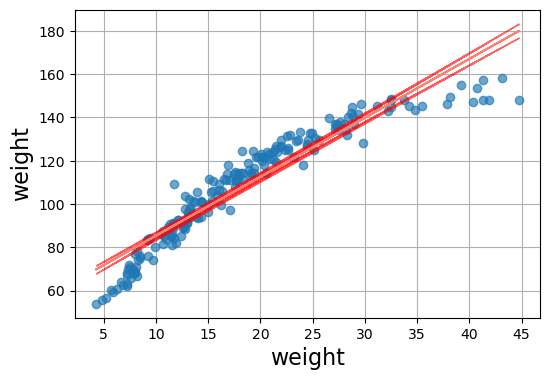

In [35]:
plt.figure(figsize=(6,4))

# plot raw data
plt.scatter(youth['weight'], youth['height'], alpha=0.66)

# plot MAP line
plt.plot(youth['weight'], map_, color='salmon')

# add HPDI
plt.fill_between(youth['weight'], y_bottom, y_top, alpha=0.6, color='r')


plt.grid()
plt.xlabel('weight', fontsize=16)
plt.ylabel('weight', fontsize=16)
plt.show()

# 4H3

In [36]:
data.shape

(544, 4)

In [37]:
with pm.Model() as log_model:
    
    # priors
    alpha = pm.Normal('alpha', 178, 100)
    beta = pm.Normal('beta', 0, 100)
    sigma = pm.Uniform('sigma', 0, 50)
    
    # deterministic
    mu = alpha + beta * np.log10(data['weight'])
    
    # likelihood
    height = pm.Normal('likelihood_height', mu=mu, sigma=sigma, observed=data['height'])
    
    trace = pm.sample(draws=1000, model=log_model)
    
    posterior_predictive = pm.sample_posterior_predictive(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 17 seconds.
The acceptance probability does not match the target. It is 0.8993188505633207, but should be close to 0.8. Try to increase the number of tuning steps.


In [45]:
posterior_predictive['likelihood_height'].shape

(2000, 544)

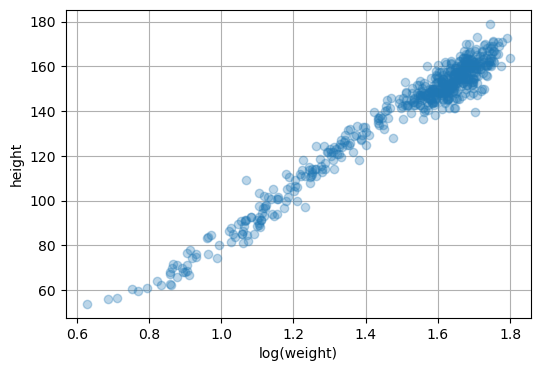

In [229]:
# plot it up
plt.figure(figsize=(6,4))
plt.scatter(np.log10(data['weight']), data['height'], alpha=0.3)
plt.xlabel('log(weight)')
plt.ylabel('height')
plt.grid()
plt.show()

In [230]:
print(trace['alpha'].mean())
print(trace['beta'].mean())

-23.766721737992917
108.38002842902571


In [231]:
# intrepretation
np.log(2.8)

1.0296194171811581

## B

In [232]:
samples = pd.DataFrame({'alpha': trace['alpha'],
                        'beta': trace['beta'],
                        'sigma': trace['sigma']})

samples.head()

,alpha,beta,sigma
0,-23.291820,108.090617,5.298943
1,-22.644884,107.784863,4.980258
2,-27.615085,110.960210,5.282785
3,-27.719026,110.822103,5.234153
4,-23.003482,108.100404,5.185956


In [244]:
# 90% HDPI of mean, superimpose MAP
x = []; y_top = []; y_bottom = []; map_ = []

for weight in data['weight']:
    
    weight_dist = samples['alpha'] + samples['beta']*np.log10(weight)
    
    map_value = np.log10(weight)*trace['beta'].mean() + trace['alpha'].mean()
    map_.append(map_value)
    
    hdpi = pm.stats.hpd(weight_dist.values, hdi_prob=0.97)
    x.append(np.log10(weight))
    y_top.append(hdpi[0])
    y_bottom.append(hdpi[1])
    
    # add the posterior predictive 
    predictions = posterior_predictive['likelihood_height']
    
    low = []; high = []
    for i in range(predictions.shape[1]):
        pred_ = predictions[:, i]
        l_, h_ = pm.stats.hpd(pred_, hdi_prob=0.97)
        low.append(l_)
        high.append(h_)
        

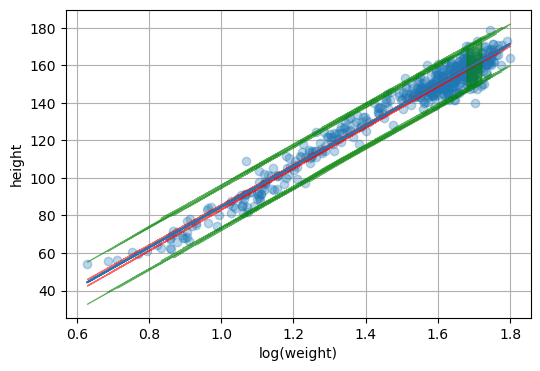

In [245]:
# plot it up
plt.figure(figsize=(6,4))

plt.scatter(np.log10(data['weight']), data['height'], alpha=0.3)

plt.plot(np.log10(data['weight']), map_)

plt.fill_between(np.log10(data['weight']), y_bottom, y_top, alpha=0.6, color='r')

plt.fill_between(np.log10(data['weight']), low, high, alpha=0.6, color='g')



plt.xlabel('log(weight)')
plt.ylabel('height')
plt.grid()
plt.show()